# Práctica 2

## Tarea 1
### TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

#### Resolucion
Utilizamos

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 255)


Máximo píxeles blancos en fila (maxfil): 0.419921875
Número de filas ≥ 90% de maxfil: 7
Posiciones de esas filas: [  6  12  15  20  21  88 100]


(0.0, 512.0)

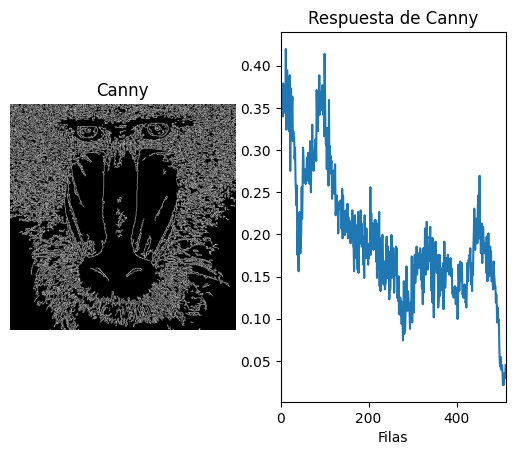

In [2]:
      #El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
gris = cv2.imread("mandril.jpg", cv2.IMREAD_GRAYSCALE)
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
rows = row_counts[:,0] / (255 * canny.shape[1])
maxfil = np.max(rows)
print("Máximo píxeles blancos en fila (maxfil):", maxfil)
limite = 0.9 * maxfil
filas_significativas = np.where(rows >= limite)[0]
print("Número de filas ≥ 90% de maxfil:", len(filas_significativas))
print("Posiciones de esas filas:", filas_significativas)
#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las Filas
plt.xlim([0, canny.shape[1]])

## Tarea 2
### TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?.


In [ ]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

In [7]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 255)
sobelx = cv2.Sobel(gris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(gris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

### Aplicación de umbralizado y cuenta de filas y columnas

#### Umbralizado

In [19]:
low_threshold = 30
high_threshold = 255
_, sobelthresh = cv2.threshold(sobel, low_threshold, high_threshold, cv2.THRESH_BINARY)
sobel_uint8 = cv2.convertScaleAbs(sobelthresh)

#### Obtención de Filas


In [ ]:
row_counts = cv2.reduce(sobel_uint8, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows = row_counts[:,0] / (255 * sobel_uint8.shape[1])
maxfil = np.max(rows)
print("Máximo píxeles blancos en fila (maxfil):", maxfil)
limite = 0.9 * maxfil
filas_significativas = np.where(rows >= limite)[0]
print("Número de filas ≥ 90% de maxfil:", len(filas_significativas))
print("Posiciones de esas filas:", filas_significativas)

Máximo píxeles blancos en fila (maxfil): 0.5234375
Número de filas ≥ 90% de maxfil: 6
Posiciones de esas filas: [ 18  79  83  89 101 112]


#### Obtención de columnas

In [23]:
col_counts = cv2.reduce(sobel_uint8, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts[0] / (255 * sobel_uint8.shape[0])
maxcol = np.max(cols)
print("Máximo píxeles blancos en columna (maxcol):", maxcol)
limite = 0.9 * maxcol
columnas_significativas = np.where(cols >= limite)[0]
print("Número de columnas ≥ 90% de maxcol:", len(columnas_significativas))
print("Posiciones de esas columnas:", columnas_significativas)

Máximo píxeles blancos en columna (maxcol): 0.544921875
Número de columnas ≥ 90% de maxcol: 2
Posiciones de esas columnas: [127 131]


### Mostrar Datos

#### Preparar imagenes de X e Y

In [33]:
img_color_x = cv2.cvtColor(sobel_uint8, cv2.COLOR_GRAY2BGR)
img_color = cv2.cvtColor(sobel_uint8, cv2.COLOR_GRAY2BGR)
for f in filas_significativas:
    cv2.line(img_color_x, (0, f), (img_color_x.shape[1], f), (0,0,255), 1)
    cv2.line(img_color, (0, f), (img_color.shape[1], f), (0,0,255), 1)
img_color_y = cv2.cvtColor(sobel_uint8, cv2.COLOR_GRAY2BGR)
for c in columnas_significativas:
    cv2.line(img_color_y, (c, 0), (c, img_color_y.shape[0]), (255,0,0), 1)
    cv2.line(img_color, (c, 0), (c, img_color.shape[0]), (255,0,0), 1)

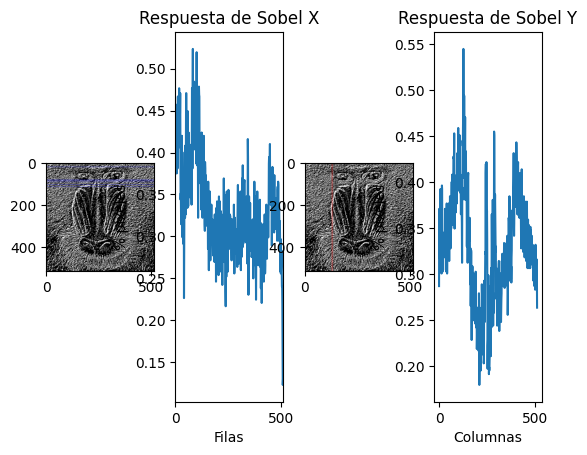

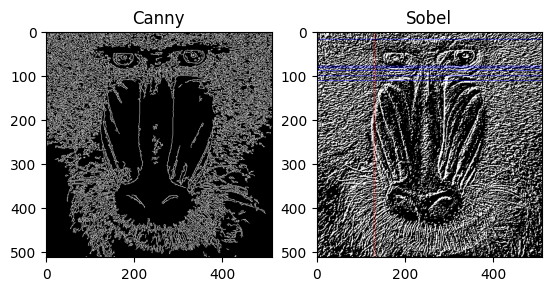

In [35]:
plt.figure()
plt.subplot(1, 4, 1)
plt.imshow(img_color_x)
plt.subplot(1, 4, 2)
plt.title("Respuesta de Sobel X")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las Filas
plt.xlim([0, sobel_uint8.shape[1]])
plt.subplot(1, 4, 3)
plt.imshow(img_color_y)
plt.subplot(1, 4, 4)
plt.title("Respuesta de Sobel Y")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Comparamos con Canny
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Canny")
plt.imshow(canny, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Sobel")
plt.imshow(img_color)
plt.show()

## Tarea 3
### TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.

### Importaciones

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

### Implementación
Al pulsar espacio cambia

In [3]:
vid = cv2.VideoCapture(0)
type = True
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)
#Marca de inicio
disponible = 0 
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
    if ret:
        if type:
            if disponible > 0:
                dif = cv2.absdiff(frame, pframe)        
                # Muestra resultado
                cv2.imshow('Diferencia', dif)    
            else:
                disponible = 1

            #Copia fotograma actual para la diferencia en el siguiente forograma
            pframe = frame.copy()
        # Detenemos pulsado ESC
        else:
            framem=cv2.flip(frame, 1)
            #Con un segundo parámerto se puede definir máscara con zonas a actualizar
            objetos = eliminadorFondo.apply(framem)
            #objetos = eliminadorFondo.apply(framem, objetos, 0)  #No actualiza el fondo
            # Obtiene fondo
            background = eliminadorFondo.getBackgroundImage()

            # Muestra resultado
            cv2.imshow('Fotograma', objetos)
            # Muestra fondo
            cv2.imshow('Fondo', background)
    key = cv2.waitKey(20) & 0xFF
    if key == 32:
        type = not type
    if key == 27:
        break                               
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

: 

## Tarea 4:
### TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.